In [9]:
import os
import zipfile

# Giải nén tệp 'dogs-vs-cats.zip' vào thư mục 'data'
with zipfile.ZipFile('dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

# Giải nén tệp 'train.zip' bên trong thư mục 'data' vào thư mục 'data/train'
with zipfile.ZipFile('data/train.zip', 'r') as zip_ref:
    zip_ref.extractall('data/train')

# Giải nén tệp 'test1.zip' bên trong thư mục 'data' vào thư mục 'data/test'
with zipfile.ZipFile('data/test1.zip', 'r') as zip_ref:
    zip_ref.extractall('data/test')


In [10]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Định nghĩa các phép biến đổi ảnh: 
# 1. Resize ảnh về kích thước (128, 128)
# 2. Chuyển đổi ảnh sang tensor
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# Tạo dataset cho tập huấn luyện từ thư mục 'data/train' với các phép biến đổi đã định nghĩa
train_dataset = datasets.ImageFolder(root='data/train', transform=transform)

# Tạo DataLoader cho tập huấn luyện với batch size là 32 và shuffle (xáo trộn) dữ liệu
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [11]:
# Tạo dataset cho tập kiểm tra từ thư mục 'data/test' với các phép biến đổi đã định nghĩa
test_dataset = datasets.ImageFolder(root='data/test', transform=transform)

# Tạo DataLoader cho tập kiểm tra với batch size là 32 và không shuffle (xáo trộn) dữ liệu
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [12]:
# Định nghĩa các phép biến đổi ảnh:
# 1. Resize ảnh về kích thước (128, 128)
# 2. Chuyển đổi ảnh sang tensor
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# Tạo dataset cho tập huấn luyện từ thư mục 'data/train' với các phép biến đổi đã định nghĩa
train_dataset = datasets.ImageFolder(root='data/train', transform=transform)

# Tạo DataLoader cho tập huấn luyện với batch size là 32 và shuffle (xáo trộn) dữ liệu
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [13]:
# Duyệt qua data loader
for batch_idx, (images, labels) in enumerate(train_loader):
    # Xử lý từng batch dữ liệu ở đây
    print(f'Batch {batch_idx + 1}:')
    print(f'Kích thước batch: {images.size(0)}')  # Kích thước của batch
    print(f'Kích thước hình ảnh: {images.shape[1:]}')  # Kích thước của từng hình ảnh trong batch
    print(f'Kích thước nhãn: {labels.shape}')  # Kích thước của nhãn trong batch

    # Tùy chọn, bạn có thể in ra nhãn của từng hình ảnh trong batch
    for i, label in enumerate(labels):
        print(f'Nhãn của hình ảnh {i}: {label}')

    # Dừng sau khi duyệt qua batch đầu tiên
    if batch_idx == 0:
        break

Batch 1:
Kích thước batch: 32
Kích thước hình ảnh: torch.Size([3, 128, 128])
Kích thước nhãn: torch.Size([32])
Nhãn của hình ảnh 0: 0
Nhãn của hình ảnh 1: 0
Nhãn của hình ảnh 2: 0
Nhãn của hình ảnh 3: 0
Nhãn của hình ảnh 4: 0
Nhãn của hình ảnh 5: 0
Nhãn của hình ảnh 6: 0
Nhãn của hình ảnh 7: 0
Nhãn của hình ảnh 8: 0
Nhãn của hình ảnh 9: 0
Nhãn của hình ảnh 10: 0
Nhãn của hình ảnh 11: 0
Nhãn của hình ảnh 12: 0
Nhãn của hình ảnh 13: 0
Nhãn của hình ảnh 14: 0
Nhãn của hình ảnh 15: 0
Nhãn của hình ảnh 16: 0
Nhãn của hình ảnh 17: 0
Nhãn của hình ảnh 18: 0
Nhãn của hình ảnh 19: 0
Nhãn của hình ảnh 20: 0
Nhãn của hình ảnh 21: 0
Nhãn của hình ảnh 22: 0
Nhãn của hình ảnh 23: 0
Nhãn của hình ảnh 24: 0
Nhãn của hình ảnh 25: 0
Nhãn của hình ảnh 26: 0
Nhãn của hình ảnh 27: 0
Nhãn của hình ảnh 28: 0
Nhãn của hình ảnh 29: 0
Nhãn của hình ảnh 30: 0
Nhãn của hình ảnh 31: 0


In [14]:
# In ra kích thước batch
print(f'Batch size: {images.shape[0]}')

# In ra kích thước ảnh
print(f'Image size: {images.shape[1:]}')

# In ra số lượng lớp duy nhất
print(f'Number of unique classes: {len(train_dataset.classes)}')

# In ra tên các lớp
print(f'Class names: {train_dataset.classes}')


Batch size: 32
Image size: torch.Size([3, 128, 128])
Number of unique classes: 1
Class names: ['train']


In [15]:
# Import thư viện matplotlib để vẽ đồ thị và hình ảnh
# %matplotlib inline để hiển thị đồ thị trực tiếp trong notebook
# Import thư viện numpy để làm việc với mảng và tính toán số học
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np




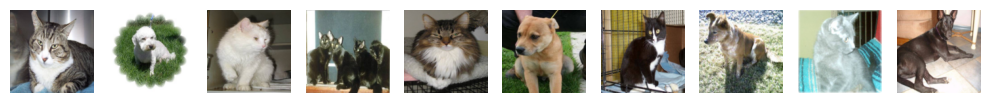

In [16]:
R, C = len(train_dataset.classes), 10

# Tạo figure và axes
fig, ax = plt.subplots(R, C, figsize=(10, 10))

# Lặp qua từng lớp
for label_class in range(R):  # Vòng lặp qua số lượng lớp
    # Lấy các chỉ số của nhãn tương ứng
    label_x_rows = np.where(labels == label_class)[0]
    
    # Lặp qua từng ô trong hàng hiện tại
    for j in range(C):  # Vòng lặp qua số lượng cột
        plot_cell = ax[label_class * C + j]  # Chọn subplot tương ứng
        plot_cell.grid(False)
        plot_cell.axis('off')
        
        # Chọn ngẫu nhiên một hình ảnh từ nhãn hiện tại
        ix = np.random.choice(label_x_rows)
        x, y = images[ix], labels[ix]
        
        # Hiển thị hình ảnh trong ô hiện tại với màu xám
        plot_cell.imshow(x.permute(1, 2, 0), cmap='gray')  # permute để chuyển chiều của hình ảnh

plt.tight_layout()
plt.show()

In [17]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn

In [18]:
# Kiểm tra nếu CUDA (GPU) khả dụng thì sử dụng, ngược lại sử dụng CPU
device = "cuda" if torch.cuda.is_available() else "cpu"

# Định nghĩa các phép biến đổi ảnh:
# 1. Resize ảnh về kích thước (128, 128)
# 2. Chuyển đổi ảnh sang tensor
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# Tạo dataset cho tập huấn luyện từ thư mục 'data/train' với các phép biến đổi đã định nghĩa
train_dataset = datasets.ImageFolder(root='data/train', transform=transform)

# Tạo DataLoader cho tập huấn luyện với batch size là 32 và shuffle (xáo trộn) dữ liệu
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [19]:


class DogCatDataset(Dataset):
    def __init__(self, x, y, device):
        x = x.float()
        x = x.view(-1, 28*28)  # Reshape tensor x if needed
        self.x, self.y = x, y
        self.device = device

    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]
        return x.to(self.device), y.to(self.device)

    def __len__(self):
        return len(self.x)

In [20]:
def get_data():
    # Tạo đối tượng dataset từ lớp DogCatDataset với dữ liệu huấn luyện và nhãn
    train = DogCatDataset(tr_images, tr_targets, device)
    
    # Tạo DataLoader từ dataset huấn luyện với batch size là 32 và shuffle dữ liệu
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    
    return trn_dl


In [21]:
from torch.optim import SGD
import torch.nn as nn

def get_model():
    # Định nghĩa mô hình neural network
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)  # Di chuyển mô hình lên thiết bị (device) nếu có sẵn

    # Định nghĩa hàm mất mát
    loss_fn = nn.CrossEntropyLoss()

    # Định nghĩa thuật toán tối ưu hóa
    optimizer = SGD(model.parameters(), lr=1e-2)

    return model, loss_fn, optimizer


In [22]:
def train_batch(x, y, model, opt, loss_fn):
    model.train() # <- let's hold on to this until we reach dropout section
# call your model like any python function on your batch of inputs
    prediction = model(x)
# compute loss
    batch_loss = loss_fn(prediction, y)
# based on the forward pass in `model(x)` compute all the gradients of
# 'model.parameters()'
    batch_loss.backward()
# apply new-weights = f(old-weights, old-weight-gradients) where
# "f" is the optimizer
    optimizer.step()
# Flush gradients memory for next batch of calculations
    optimizer.zero_grad()
    return batch_loss.item()

In [23]:
@torch.no_grad()
def accuracy(x, y, model):
    model.eval() # <- let's wait till we get to dropout section
# get the prediction matrix for a tensor of `x` images
    prediction = model(x)
# compute if the location of maximum in each row coincides
# with ground truth
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

In [24]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 2)  # 2 classes: Cat and Dog

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 32 * 32)  # Flatten tensor thành vector
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [25]:
def train_batch(x, y, model, optimizer, loss_fn):
    # Chuyển mô hình sang chế độ huấn luyện
    model.train()

    # Đặt đạo hàm của các tham số về 0
    optimizer.zero_grad()

    # Tính toán dự đoán từ mô hình
    prediction = model(x)

    # Tính toán hàm mất mát cho từng batch
    batch_loss = loss_fn(prediction, y)

    # Lan truyền ngược để tính gradient
    batch_loss.backward()

    # Cập nhật các tham số mô hình bằng thuật toán tối ưu hóa
    optimizer.step()

    return batch_loss.item()


In [26]:
def accuracy(x, y, model):
    # Chuyển mô hình sang chế độ đánh giá (không tính gradient)
    model.eval()

    # Với các phép tính không cập nhật gradient
    with torch.no_grad():
        # Tính toán dự đoán từ mô hình
        prediction = model(x)

        # So sánh chỉ số có giá trị lớn nhất (argmax) giữa dự đoán và nhãn y
        is_correct = (torch.argmax(prediction, dim=1) == y).float()

    # Trả về kết quả là một mảng numpy
    return is_correct.numpy()


In [27]:
import torch.optim as optim
model = SimpleCNN()  # Khởi tạo mô hình SimpleCNN
loss_fn = nn.CrossEntropyLoss()  # Định nghĩa hàm mất mát CrossEntropyLoss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Định nghĩa thuật toán tối ưu hóa Adam

# Huấn luyện mô hình
losses, accuracies = [], []  # Danh sách để lưu giá trị mất mát và độ chính xác qua từng epoch
for epoch in range(5):
    print(f"Epoch {epoch + 1}/{5}")  # In ra số epoch hiện tại

    epoch_losses, epoch_accuracies = [], []  # Danh sách để lưu giá trị mất mát và độ chính xác của từng epoch


Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


In [28]:
for ix, batch in enumerate(train_loader):
    x, y = batch
    batch_loss = train_batch(x, y, model, optimizer, loss_fn)  # Huấn luyện mô hình trên mỗi batch
    epoch_losses.append(batch_loss)  # Lưu giá trị mất mát của từng batch vào danh sách

epoch_loss = np.array(epoch_losses).mean()  # Tính giá trị mất mát trung bình qua toàn bộ epoch
